#### Download unavailable libraries, if necessary

In [ ]:
#import sys
#!{sys.executable} -m pip install seaborn

#### Import all libraries

In [2]:
import tensorflow_datasets as tfds
import xml.etree.ElementTree as ET
import glob
import os
import PIL 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

#### Calculate the centroid of Bbox from xml files

In [3]:
pick_files = r'/Users/praveen/Desktop/dataset_pra/JPEGImages'
left_corner = []
right_corner = []
middle = []
for files in glob.glob(os.path.join(pick_files, '*.xml')):
    tree = ET.parse(files)
    root = tree.getroot()
    for size in root.findall('size'):
        width = int(size.find('width').text)
        left = int(width * 1/3) 
        right = int(width * 2/3) 
        for bndbox in root.findall('object'):
            xCentroid = int(bndbox.find('bndbox').find('xmin').text) + int(bndbox.find('bndbox').find('ymin').text)/2;
            if xCentroid <= left:
                left_corner.append(xCentroid)
            elif xCentroid >= right:
                right_corner.append(xCentroid)
            elif int(xCentroid > left) & int(xCentroid < right):
                middle.append(xCentroid)
            else:
                print('error')
                xxx = root.findall('filename')
                for fileeee in xxx:
                    print(fileeee.text)

#### Plot the distribution

Text(0, 0.5, 'x-Centroid of Bboxes')

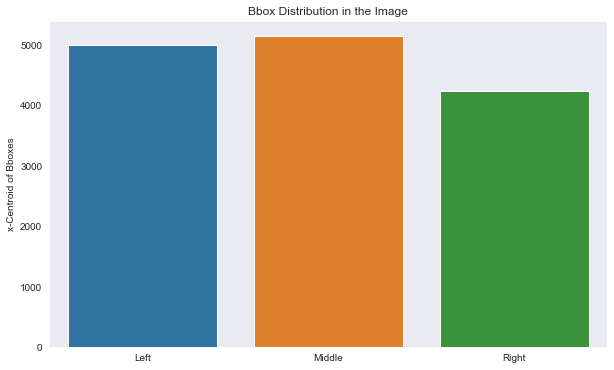

In [4]:
sns.set_style("dark")
plt.figure(figsize=(10,6))
plt.title("Bbox Distribution in the Image")

# Bar chart 
sns.barplot(x= ['Left', 'Middle', 'Right'], y= [len(left_corner), len(middle), len(right_corner)])
plt.ylabel("x-Centroid of Bboxes")

#### Resolution of the images
* The resolution of the image is calculated using Height and width
* min, max and mean resolutions are calculated and grouped for visualization

In [5]:
size_df = pd.DataFrame()
for files in glob.glob(os.path.join(pick_files, '*.jpg')):
    image = PIL.Image.open(files)
    width, height = image.size
    size_df = size_df.append({'Width':width, 'Height':height, 'Resolution':int(width * height)},ignore_index=True)

#### Check the max, min and mean values of Resolution

In [6]:
print('Minimum Resolution: ', size_df['Resolution'].min(), '\nMaximum Resolution:', size_df['Resolution'].max(),'\nCount of Resolution:', size_df['Resolution'].count())

Minimum Resolution:  48000.0 
Maximum Resolution: 250000.0 
Count of Resolution: 4544


#### Calculate the Occurrances and plot the Histogram accordingly

In [7]:
size_df.groupby(pd.cut(size_df.Resolution, 5)).count()

,Height,Resolution,Width
Resolution,,,
"(47798.0, 88400.0]",45,45,45
"(88400.0, 128800.0]",82,82,82
"(128800.0, 169200.0]",1462,1462,1462
"(169200.0, 209600.0]",2810,2810,2810
"(209600.0, 250000.0]",145,145,145


#### Bar plots to visualize Resolution

Text(0.5, 0, 'Range of Resolution')

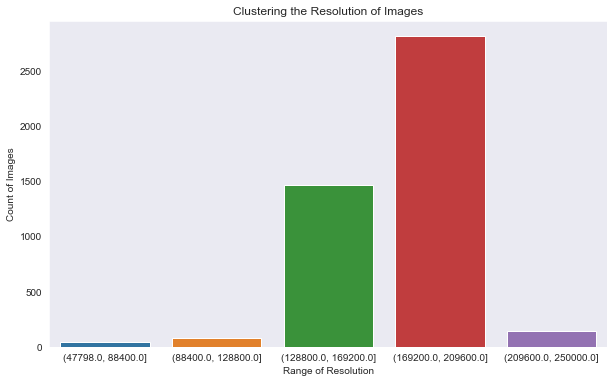

In [10]:
sns.set_style("dark")
plt.figure(figsize=(10,6))
plt.title("Clustering the Resolution of Images")

# Bar chart 
sns.barplot(x= ['(47798.0, 88400.0]', '(88400.0, 128800.0]', '(128800.0, 169200.0]','(169200.0, 209600.0]','(209600.0, 250000.0]'], y= [45, 82, 1462, 2810, 145])
plt.ylabel("Count of Images")
plt.xlabel("Range of Resolution")

#### Histogram plots of Height vs Width

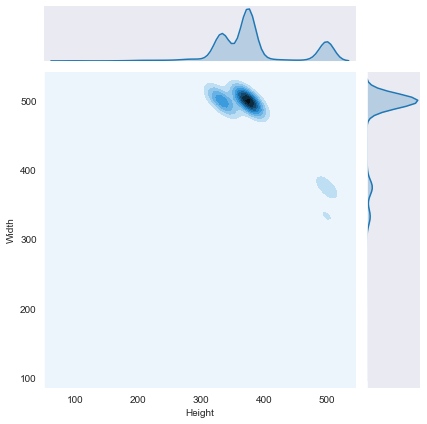

In [9]:
sns.set_style("dark")
sns.jointplot(x=size_df['Height'], y=size_df['Width'], kind="kde")

#### Data Pipelining using tf.Data